In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters import *

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS full-batch hyperparameters tuning 



In [5]:
datapoints=[len(trainset)]
history_size_grid=[5,10,20]

In [6]:
epochs = 15

### Fully connected network

In [14]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,datapoints, history_size_grid, epochs, "FCNN",fullbatch=True)

Minibatch size:  60000
History size:  5
Epoch 0
Training loss: 0.6264114379882812
Number Of Images Tested = 10000
Model Accuracy = 0.8123
Number Of Images Tested = 60000
Model Accuracy = 0.8067333333333333
Test loss: 0.6104886531829834 

Epoch 1
Training loss: 0.45036032795906067
Number Of Images Tested = 10000
Model Accuracy = 0.8745
Number Of Images Tested = 60000
Model Accuracy = 0.8658666666666667
Test loss: 0.43040958046913147 

Epoch 2
Training loss: 0.38807210326194763
Number Of Images Tested = 10000
Model Accuracy = 0.8893
Number Of Images Tested = 60000
Model Accuracy = 0.8861166666666667
Test loss: 0.371009886264801 

Epoch 3
Training loss: 0.34127187728881836
Number Of Images Tested = 10000
Model Accuracy = 0.8996
Number Of Images Tested = 60000
Model Accuracy = 0.8985333333333333
Test loss: 0.32805508375167847 

Epoch 4
Training loss: 0.3041183352470398
Number Of Images Tested = 10000
Model Accuracy = 0.9117
Number Of Images Tested = 60000
Model Accuracy = 0.91095
Test loss

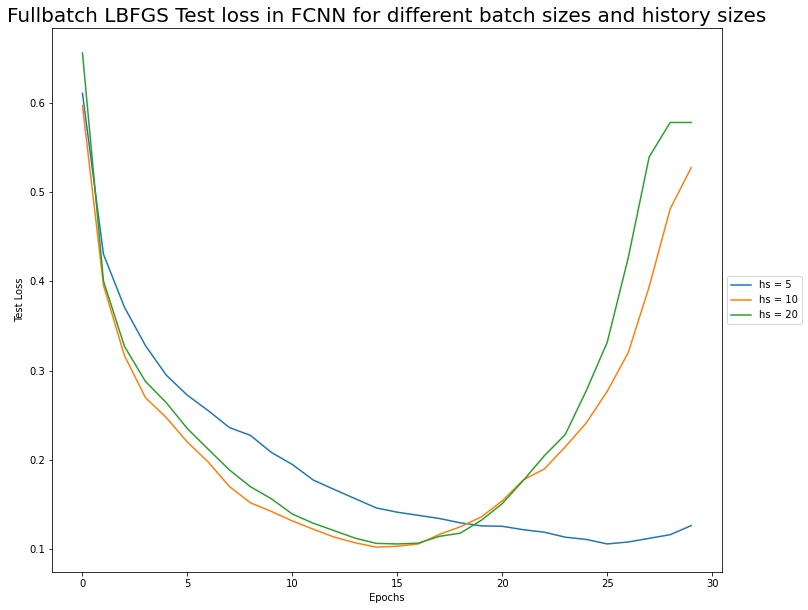

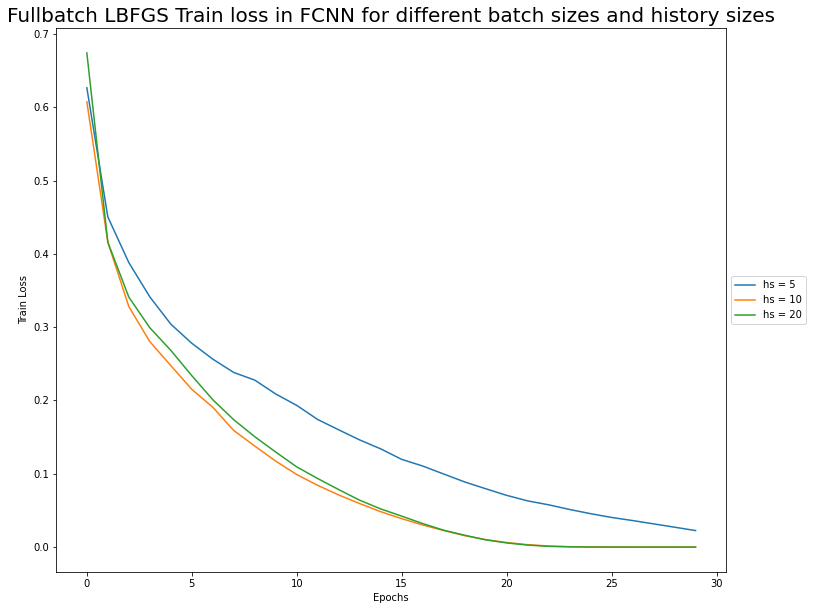

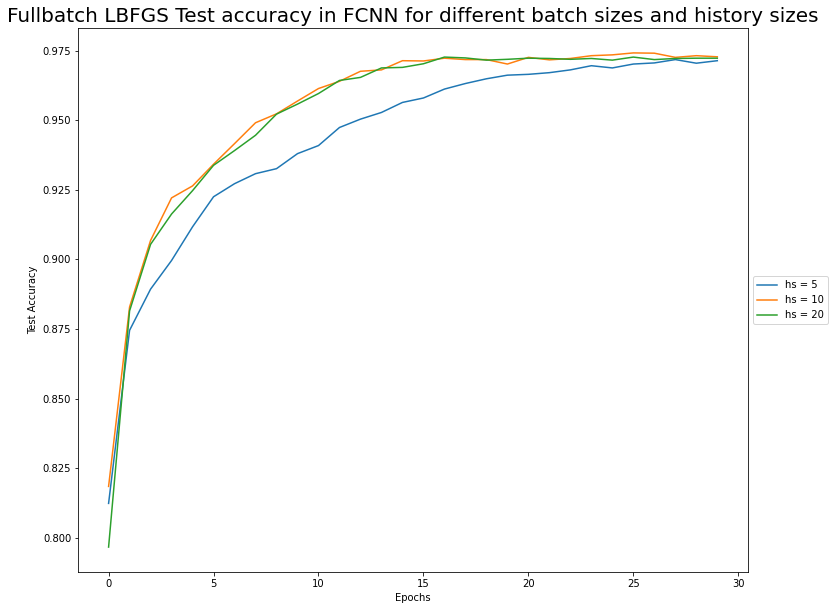

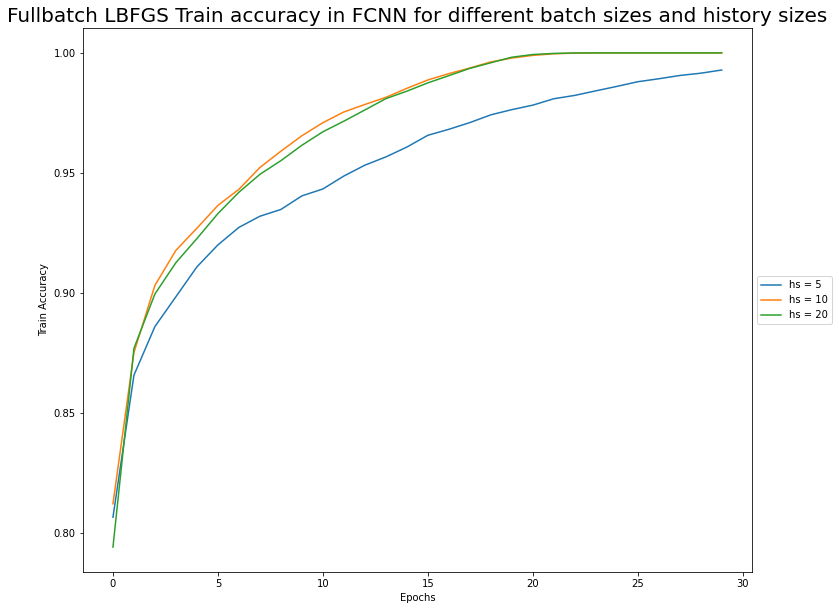

In [17]:
for bs_index,bs in enumerate(datapoints):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (12,10))
        plt.plot(test_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(2, figsize = (12,10))
        plt.plot(training_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(test_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(training_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Fullbatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Fullbatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fullbatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Fullbatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_train_acc_fcnn.jpg")

In [0]:
np.savetxt('LBFGS_fullbatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('LBFGS_fullbatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('LBFGS_fullbatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('LBFGS_fullbatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('LBFGS_fullbatch_fcNN_times.txt',time_fcnn)

### Convolutional neural network

In [7]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,datapoints, history_size_grid, epochs, "CNN")


Minibatch size:  60000
History size:  5
Epoch 0
Training loss: 0.6999953985214233
Number Of Images Tested = 10000
Model Accuracy = 0.8506
Number Of Images Tested = 60000
Model Accuracy = 0.8411166666666666
Test loss: 0.5037688612937927 

Epoch 1
Training loss: 0.30367913842201233
Number Of Images Tested = 10000
Model Accuracy = 0.9162
Number Of Images Tested = 60000
Model Accuracy = 0.9089166666666667
Test loss: 0.2865537106990814 

Epoch 2
Training loss: 0.17512287199497223
Number Of Images Tested = 10000
Model Accuracy = 0.9529
Number Of Images Tested = 60000
Model Accuracy = 0.9486
Test loss: 0.16201716661453247 

Epoch 3
Training loss: 0.10486702620983124
Number Of Images Tested = 10000
Model Accuracy = 0.9707
Number Of Images Tested = 60000
Model Accuracy = 0.9682
Test loss: 0.09172610938549042 

Epoch 4
Training loss: 0.07217469811439514
Number Of Images Tested = 10000
Model Accuracy = 0.9808
Number Of Images Tested = 60000
Model Accuracy = 0.97815
Test loss: 0.06173286586999893 

Test loss: 0.03530988469719887 

Epoch 11
Training loss: 0.003132600337266922
Number Of Images Tested = 10000
Model Accuracy = 0.9907
Number Of Images Tested = 60000
Model Accuracy = 0.9994666666666666
Test loss: 0.04815584793686867 

Epoch 12
Training loss: 0.001611637882888317
Number Of Images Tested = 10000
Model Accuracy = 0.9908
Number Of Images Tested = 60000
Model Accuracy = 0.9997833333333334
Test loss: 0.05999729782342911 

Epoch 13
Training loss: 0.00042440343531779945
Number Of Images Tested = 10000
Model Accuracy = 0.9906
Number Of Images Tested = 60000
Model Accuracy = 0.9999833333333333
Test loss: 0.06830162554979324 

Epoch 14
Training loss: 7.963576354086399e-05
Number Of Images Tested = 10000
Model Accuracy = 0.9907
Number Of Images Tested = 60000
Model Accuracy = 1.0
Test loss: 0.08329416811466217 


Training Time (in minutes) = 243.54828588167825


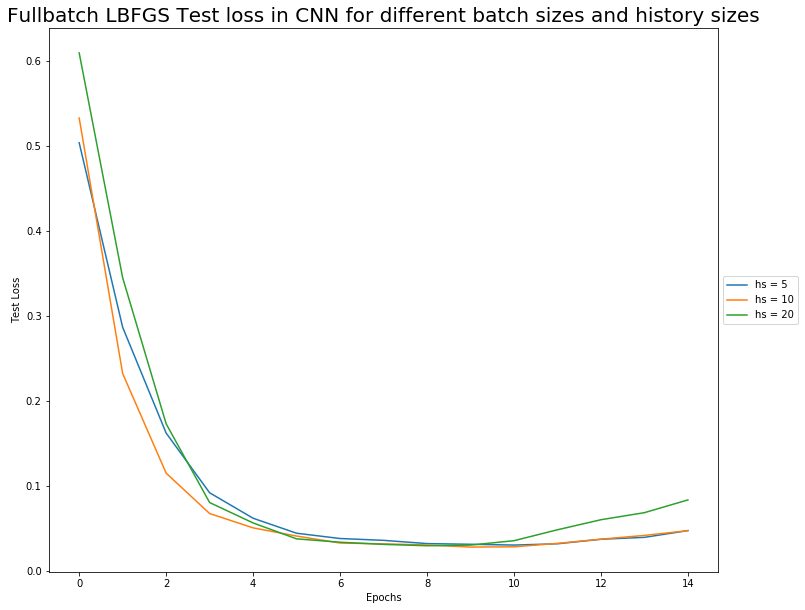

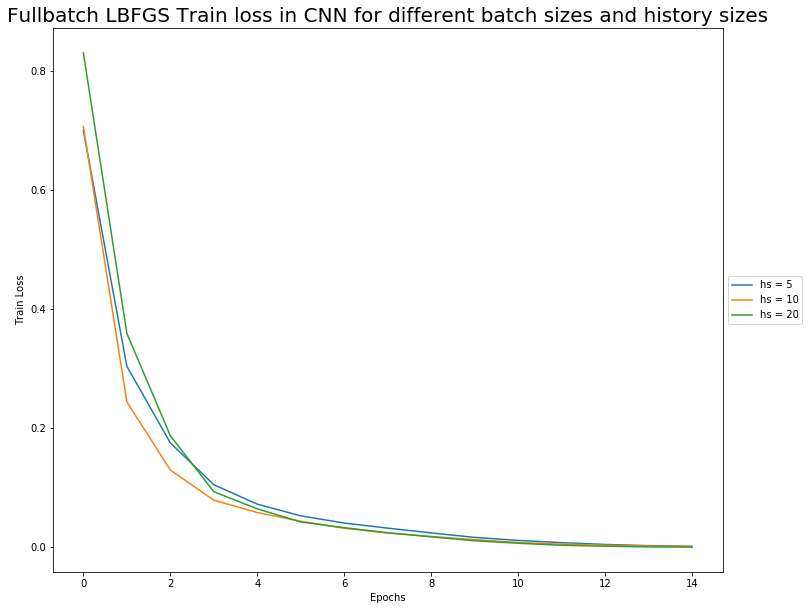

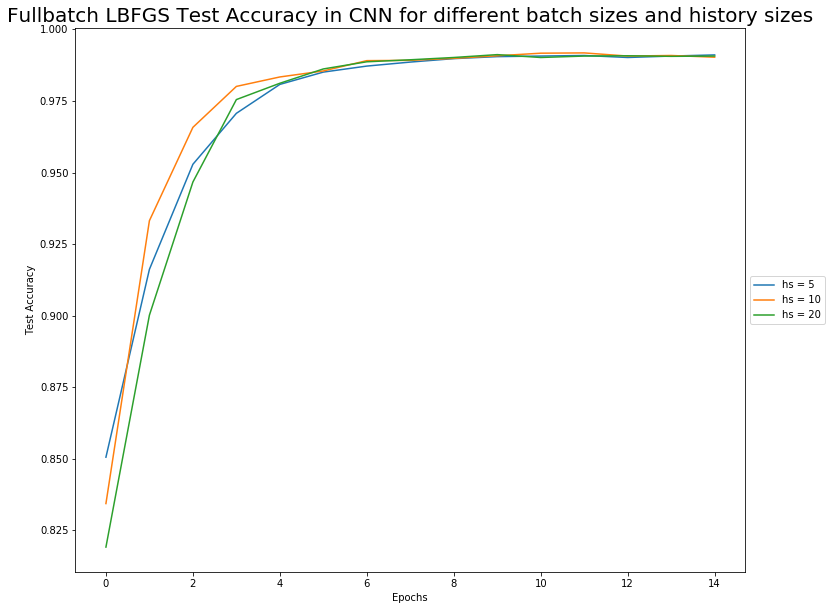

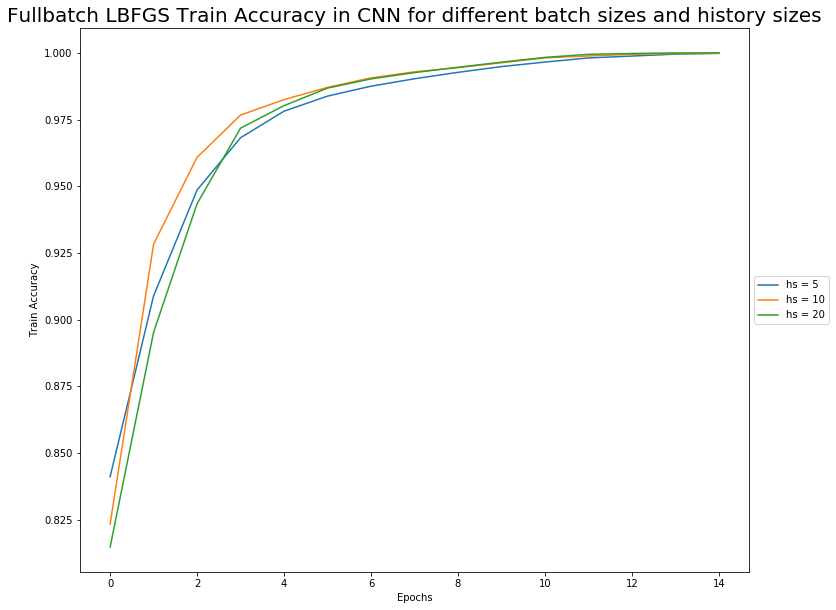

In [10]:
for bs_index,bs in enumerate(datapoints):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (12,10))
        plt.plot(test_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(2, figsize = (12,10))
        plt.plot(training_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(test_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(training_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Fullbatch LBFGS Test loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_test_loss_cnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Fullbatch LBFGS Train loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_train_loss_cnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fullbatch LBFGS Test Accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_test_acc_cnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Fullbatch LBFGS Train Accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("LBFGS_train_acc_cnn.jpg")


In [0]:
np.savetxt('LBFGS_minibatch_CNN_trainloss.txt', training_loss_fcnn)
np.savetxt('LBFGS_minibatch_CNN_testloss.txt', test_loss_fcnn)
np.savetxt('LBFGS_minibatch_CNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('LBFGS_minibatch_CNN_testacc.txt', test_accuracy])
np.savetxt('LBFGS_minibatch_CNN_times.txt',time)